<a href="https://colab.research.google.com/github/alaydv/neuronal_network_with_numbers/blob/main/keras_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [ ]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_data.shape

(60000, 28, 28)

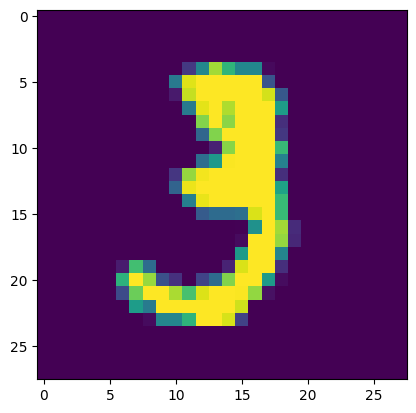

In [ ]:
plt.imshow(train_data[10])

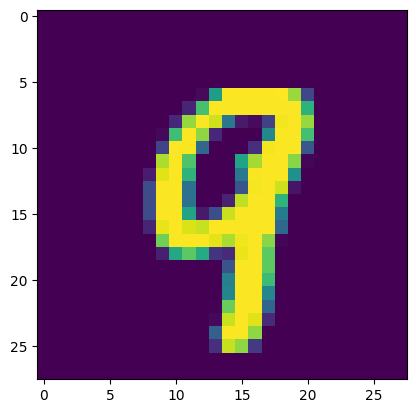

In [ ]:
plt.imshow(train_data[800])

In [ ]:
train_labels[800]

9

## Creación del modelo de red neuronal

In [ ]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics='accuracy')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train = train_data.reshape((60000,28*28))
x_train = x_train.astype('float32')/255

x_test = test_data.reshape((10000,28*28))
x_test = x_test.astype('float32')/255

In [ ]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [ ]:
train_labels[0]

5

In [ ]:
y_train[800]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Entrenamiento de red

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 7s 3ms/step - loss: 0.2625 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.1067 - accuracy: 0.9684
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0706 - accuracy: 0.9796
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0509 - accuracy: 0.9846
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0391 - accuracy: 0.9884


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0630 - accuracy: 0.9813


[0.06302449852228165, 0.9812999963760376]